# Data Exploration Using Pandas

This project demonstrates Data expolration techniques using popular scientific libraries like NumPy and Pandas on the used cars dataset from ebay Kleinanzeigen.

Let's start with importing the required libraries

In [14]:
import numpy as np
import pandas as pd

In [59]:
autos = pd.read_csv('autos.csv', encoding="Latin-1")

In [16]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [17]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

Column names seem to be inconsistent and a few of them contain null values. Let's clean our dataframe

## Data Cleaning

Let's start by renaming the columns to snakecase and changing a few column names

In [60]:
new_columns = {'yearOfRegistration': 'registration_year',
              'monthOfRegistration': 'registration_month',
              'notRepairedDamage': 'unrepaired_damage',
              'dateCreated': 'ad_created'}

In [61]:
autos.rename(new_columns, axis=1, inplace=True)

Ok, we have changed the name of a few columns. Now let's rename the remaining columns to snakecase

In [62]:
import re
def camelcase_to_snakecase(str):
    """Convert camelcase string to snakecase"""
    str_ = ""
    j = -2
    for i, c in enumerate(str):
        if c.isupper() and j!=i-1:
            str_ += '_' + c.lower()
            j = i
        else:
            str_ += c.lower()
    return str_

In [63]:
# Create a dict with new snakecase column names
snakecase_columns = {c: camelcase_to_snakecase(c) for c in autos.columns}

In [64]:
# Use df.rename() to rename the columns
autos.rename(snakecase_columns, axis=1, inplace=True)

Let's verify the new columns names

In [65]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

The columns seem much more consistent now and easy to deal with.

In [25]:
autos.describe()

,registration_year,power_ps,registration_month,nr_of_pictures,postal_code
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


Hmm, some of our columns seem to have unrealistic values. For instance, registration_year column has min year as 1000 and max as 9999, registration_month has 0 as a value (or 12 if they are indexed from 0 which is unlikely) nr_of_picutes seem to only contain 0's This columns doesn't provide any information.

In [66]:
autos[["price", "odometer"]].head()

,price,odometer
0,"$5,000","150,000km"
1,"$8,500","150,000km"
2,"$8,990","70,000km"
3,"$4,350","70,000km"
4,"$1,350","150,000km"


These columns are of object dtype as they contain non-numeric characters ('$' and 'km'). Let's change them to numeric values

In [31]:
print(autos["price"].str.contains(".").sum())
print(autos["odometer"].str.contains(".").sum())

50000
50000


These columns don't seem to contain a decimal point, we can represent them as integers (otherwise, we would have represented them as float)

In [67]:
autos["price"] = autos["price"].str.replace("$", "").str.replace(",", "").astype(int)
autos["odometer"] = autos["odometer"].str.replace("km", "").str.replace(",", "").astype(int)

Now, let's rename the odometer column to odometer_km to denote that it contains values in km

In [68]:
autos.rename({'odometer': 'odometer_km'}, axis=1, inplace=True)

In [35]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
date_crawled          50000 non-null object
name                  50000 non-null object
seller                50000 non-null object
offer_type            50000 non-null object
price                 50000 non-null int64
abtest                50000 non-null object
vehicle_type          44905 non-null object
registration_year     50000 non-null int64
gearbox               47320 non-null object
power_ps              50000 non-null int64
model                 47242 non-null object
odometer_km           50000 non-null int64
registration_month    50000 non-null int64
fuel_type             45518 non-null object
brand                 50000 non-null object
unrepaired_damage     40171 non-null object
ad_created            50000 non-null object
nr_of_pictures        50000 non-null int64
postal_code           50000 non-null int64
last_seen             50000 non-null object
dtypes: int64(7), 

## Data Exploration

Let's explore the price and odometer columns to see any anomalies

In [38]:
print(autos["price"].unique().shape, autos["odometer_km"].unique().shape)

(2357,) (13,)


In [42]:
autos[["price", "odometer_km"]].describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

,price,odometer_km
count,5.000000e+04,50000.000000
mean,9.840044e+03,125732.700000
std,4.811044e+05,40042.211706
min,0.000000e+00,5000.000000
25%,1.100000e+03,125000.000000
50%,2.950000e+03,150000.000000
75%,7.200000e+03,150000.000000
90%,1.400000e+04,150000.000000
95%,1.990000e+04,150000.000000
99%,3.590000e+04,150000.000000


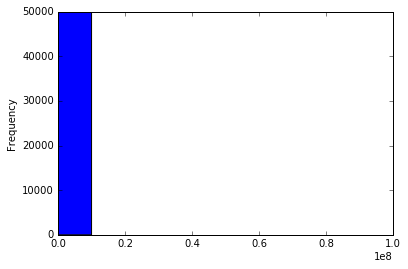

In [41]:
%matplotlib inline
autos["price"].plot(kind='hist')

There seems to be a huge gap between the max value and the 95 percentile value for the price column. Let's look at the values

In [47]:
autos["price"].value_counts().sort_index().tail(20)

197000      1
198000      1
220000      1
250000      1
259000      1
265000      1
295000      1
299000      1
345000      1
350000      1
999990      1
999999      2
1234566     1
1300000     1
3890000     1
10000000    1
11111111    2
12345678    3
27322222    1
99999999    1
Name: price, dtype: int64

Some of these values look unrealistic ('12345678', '9999999', '11111111', etc.)
These are outliers that pollute our data

In [48]:
Q1, Q3 = 1100, 7200
IQR = Q3 - Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print(min_, max_)

-8050.0 16350.0


We will clip the price values at 16350 and also remove the ones that have price as 0

(46216,)


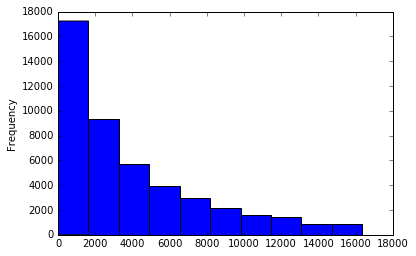

In [69]:
autos.loc[autos["price"].between(0, 16350), "price"].plot(kind='hist')
print(autos.loc[autos["price"].between(0, 16350), "price"].shape)

In [70]:
autos = autos[autos["price"].between(0, 16350)]

In [71]:
autos["odometer_km"].describe()

count     46216.000000
mean     129603.275922
std       36811.596099
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

We don't see any unrealistic values for the odometer readings and hence not remove any further columns

## Exploring Date Columns

In [72]:
autos[["date_crawled", "ad_created", "last_seen"]].head()

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [128]:
date_crawled = autos["date_crawled"].str[:10].value_counts(normalize=True, 
                                            dropna=False).sort_index()
date_crawled

2016-03-05    0.025576
2016-03-06    0.013891
2016-03-07    0.036048
2016-03-08    0.033603
2016-03-09    0.033257
2016-03-10    0.032629
2016-03-11    0.032391
2016-03-12    0.037217
2016-03-13    0.015492
2016-03-14    0.037065
2016-03-15    0.033863
2016-03-16    0.029838
2016-03-17    0.031850
2016-03-18    0.012939
2016-03-19    0.034360
2016-03-20    0.037649
2016-03-21    0.037325
2016-03-22    0.032651
2016-03-23    0.032651
2016-03-24    0.029124
2016-03-25    0.032153
2016-03-26    0.032889
2016-03-27    0.030682
2016-03-28    0.034772
2016-03-29    0.034252
2016-03-30    0.033798
2016-03-31    0.031677
2016-04-01    0.032954
2016-04-02    0.034923
2016-04-03    0.038623
2016-04-04    0.036373
2016-04-05    0.012961
2016-04-06    0.003181
2016-04-07    0.001342
Name: date_crawled, dtype: float64

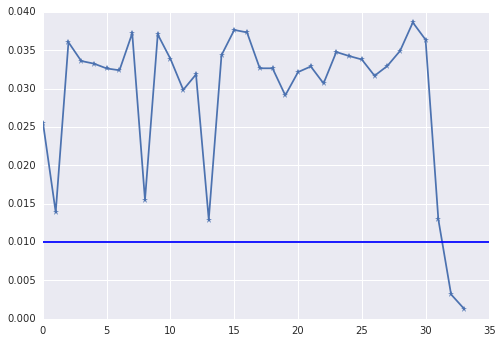

In [162]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

plt.plot(date_crawled.values, marker='*')
plt.axhline(y=0.01)

The distribution seems to drop drastically after 2016-04-05

In [163]:
ad_created = autos["ad_created"].str[:10].value_counts(normalize=True, 
                                                       dropna=False).sort_index()
ad_created

2015-08-10    0.000022
2015-09-09    0.000022
2015-11-10    0.000022
2015-12-05    0.000022
2015-12-30    0.000022
2016-01-03    0.000022
2016-01-07    0.000022
2016-01-10    0.000043
2016-01-13    0.000022
2016-01-16    0.000022
2016-01-22    0.000022
2016-01-27    0.000065
2016-01-29    0.000022
2016-02-01    0.000022
2016-02-02    0.000043
2016-02-05    0.000043
2016-02-08    0.000022
2016-02-09    0.000043
2016-02-11    0.000022
2016-02-12    0.000065
2016-02-14    0.000022
2016-02-16    0.000022
2016-02-17    0.000022
2016-02-18    0.000043
2016-02-19    0.000065
2016-02-20    0.000043
2016-02-21    0.000065
2016-02-22    0.000022
2016-02-23    0.000087
2016-02-24    0.000022
                ...   
2016-03-09    0.033279
2016-03-10    0.032370
2016-03-11    0.032716
2016-03-12    0.037065
2016-03-13    0.016769
2016-03-14    0.035702
2016-03-15    0.033711
2016-03-16    0.030314
2016-03-17    0.031418
2016-03-18    0.013675
2016-03-19    0.033279
2016-03-20    0.037693
2016-03-21 

'2016-03-04'

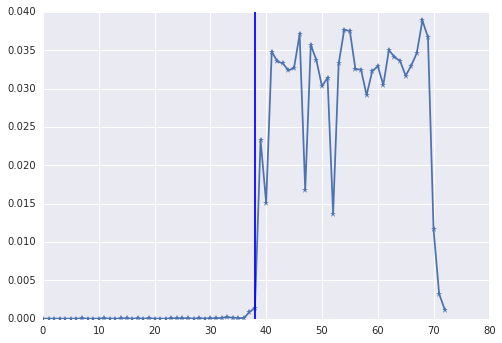

In [182]:
plt.plot(ad_created.values, marker='*')
plt.axvline(x=38)
ad_created.index[38]

It seems like very few ads were created before '2016-03-04'

In [183]:
last_seen = autos["last_seen"].str[:10].value_counts(normalize=True, 
                                                     dropna=False).sort_index()
last_seen

2016-03-05    0.001168
2016-03-06    0.004674
2016-03-07    0.005647
2016-03-08    0.008071
2016-03-09    0.010321
2016-03-10    0.011252
2016-03-11    0.013177
2016-03-12    0.024926
2016-03-13    0.009456
2016-03-14    0.013069
2016-03-15    0.016271
2016-03-16    0.016942
2016-03-17    0.028843
2016-03-18    0.007638
2016-03-19    0.016358
2016-03-20    0.021270
2016-03-21    0.021270
2016-03-22    0.022135
2016-03-23    0.019149
2016-03-24    0.020209
2016-03-25    0.019971
2016-03-26    0.017397
2016-03-27    0.016596
2016-03-28    0.021659
2016-03-29    0.022979
2016-03-30    0.025532
2016-03-31    0.024364
2016-04-01    0.023628
2016-04-02    0.025186
2016-04-03    0.025835
2016-04-04    0.025186
2016-04-05    0.120867
2016-04-06    0.213671
2016-04-07    0.125281
Name: last_seen, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  from ipykernel import kernelapp as app


'2016-04-06'

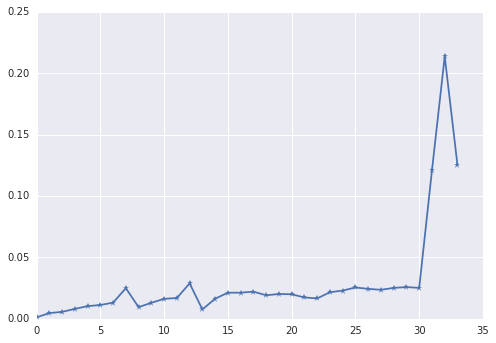

In [189]:
plt.plot(last_seen.values, marker='*')
last_seen.argmax()

2016-04-06 had the maximum views

In [191]:
autos["registration_year"].describe()

count    46216.000000
mean      2004.343864
std         96.225496
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2007.000000
max       9999.000000
Name: registration_year, dtype: float64

In [212]:
(~autos["registration_year"].between(1900, 2016)).sum()

1922

In [214]:
autos.loc[autos["registration_year"].between(1900, 2016), "registration_year"].describe()

count    44294.000000
mean      2002.297173
std          6.895191
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2007.000000
max       2016.000000
Name: registration_year, dtype: float64

In [208]:
Q1, Q3 = 1999, 2007
IQR = Q3 - Q1
min_ = Q1 - 1.5 * IQR
max_ = Q3 + 1.5 * IQR
print(min_, max_)

1987.0 2019.0


Statistically, values outside the above range are outliers. However, any vehicle with a registration year above 2016 is definitely inaccurate. So we cap at 2016 and set the minimum year as 1987

In [217]:
autos = autos[autos["registration_year"].between(1987, 2016)]
autos["registration_year"].describe()

count    43456.00000
mean      2002.80555
std          5.68974
min       1987.00000
25%       1999.00000
50%       2003.00000
75%       2007.00000
max       2016.00000
Name: registration_year, dtype: float64

In [246]:
mean_price = autos[["brand", "price"]].groupby("brand").mean().sort_values("price")
mean_price.head()

,price
brand,
daewoo,1019.861111
rover,1185.031250
trabant,1327.871795
daihatsu,1574.256198
lancia,2118.591837


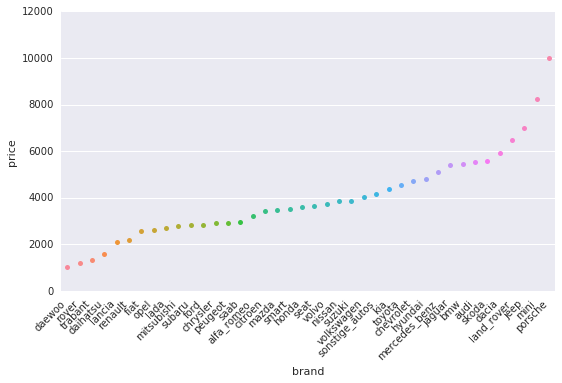

In [247]:
ax = sns.stripplot(x=mean_price.index, y="price", data=mean_price)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

In [253]:
mean_price_mileage = autos[["brand", "price", "odometer_km"]].groupby("brand").mean().sort_values("price")
mean_price_mileage.head()

,price,odometer_km
brand,,
daewoo,1019.861111,122430.555556
rover,1185.031250,135390.625000
trabant,1327.871795,64615.384615
daihatsu,1574.256198,115909.090909
lancia,2118.591837,123979.591837


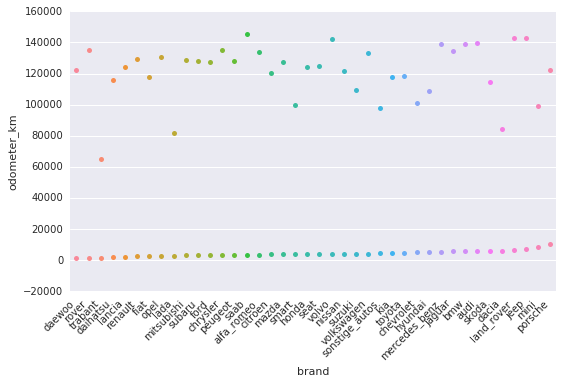

In [257]:
ax = sns.stripplot(x=mean_price_mileage.index, y="price", 
                   data=mean_price_mileage)
sns.stripplot(x=mean_price_mileage.index, y="odometer_km", 
             data=mean_price_mileage)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

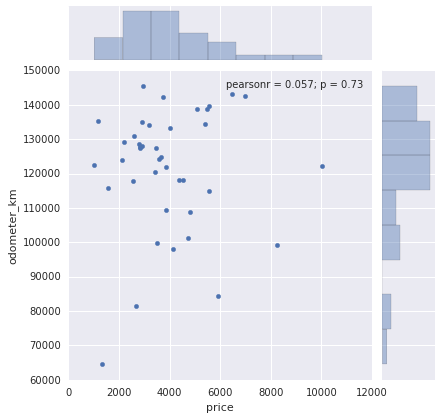

In [258]:
sns.jointplot(x="price", y="odometer_km", data=mean_price_mileage)

From the above plot, it seems like cars with higher mileage have lower price (which makes sense)